## **Case: Dados de Desenvolvimento Econômico**

----------------------------------

**Estrutura do Notebook**
* Import dos Dados
* Tratamento dos Dados
* Solução

----------------------------------

### **Import dos Dados**

Para analisar dados em python, é recomendável instalar a biblioteca **Pandas**. Isso pode ser feito usando pip, o gerenciador de pacotes do Python. No Jupyter Notebook, eles podem executar o seguinte comando:

In [2]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/fc/84/7f801a42a67b9772a883223a0a1e12069a14626c81a732bd70aac57aebc1/numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/eb/38/ac33370d784287baa1c3d538978b5e2ea064d4c1b93ffbd12826c190dd10/pytz-2025.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/0f/dd/84f10e23edd882c6f968c21c2434fe67bd4a528


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Após a instalação, é importar a importar a biblioteca conforme realizado na célula abaixo:

In [3]:
import pandas as pd

In [ ]:
# Importando dados de abas específicas de arquivos do excel
df_desenvolvimento = pd.read_excel("IDH - Dados Reais.xlsx", sheet_name = "Desenvolvimento")

In [ ]:
df_desenvolvimento.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capta ($)
0,Switzerland,0.967,13.904066,69432.78669
1,Norway,0.966,13.062343,69189.76165
2,Iceland,0.959,13.767170,54688.37921
3,"Hong Kong, China (SAR)",0.956,12.347770,62485.50516
4,Denmark,0.952,12.960490,62018.95694


In [ ]:
# Importando dados de abas específicas de arquivos do excel
df_pais_continente = pd.read_excel("IDH - Dados Reais.xlsx", sheet_name = "País - Continente")

In [ ]:
df_pais_continente.head()

,País,Continente
0,Switzerland,Europe
1,Norway,Europe
2,Iceland.,Europe
3,"Hong Kong, China (SAR)",Asia
4,Denmark,Europe


-------------------------------------------------------------

### **Tratamento dos Dados**

A etapa de tratamento dos dados é essencial para garantir a qualidade, consistência e integridade dos dados, permitindo análises precisas e tomadas de decisão informadas.

Neste case, é necessário garantir que o nome dos países estejam iguais nos dataframes _df_pais_continente_ e _df_desenvolvimento_ a fim de conseguirmos cruzar a informação das duas tabelas. Para este processo de remoção de ruído de dados textuais, damos o nome de **normalização**

#### **Etapas da Normalização**

**_1) Remoção de caixa alta_**

In [ ]:
# Convertendo texto para minúsculas
df_pais_continente['País'] = df_pais_continente['País'].str.lower()
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.lower()

In [ ]:
df_desenvolvimento['País'].head()

0               switzerland
1                    norway
2                   iceland
3    hong kong, china (sar)
4                   denmark
Name: País, dtype: object

------------------------------------------------------------

**_2) Remoção de pontos_**

In [ ]:
df_pais_continente['País'] = df_pais_continente['País'].str.replace('.','')
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.replace('.','')

------------------------------------------------------------

**3) Remoção de espaços excessivos**
    
    a) Extremidades

In [ ]:
teste_sem_espacos = "Isso é um teste"

teste_com_espacos = " Isso é um teste "

teste_sem_espacos == teste_com_espacos

False

In [ ]:
teste_arrumado = teste_com_espacos.strip()

In [ ]:
teste_sem_espacos == teste_arrumado

True

**3) Remoção de espaços excessivos**
    
    a) Extremidades
    
    b) Espaço entre Palavras

In [ ]:
teste_sem_espacos = "Isso é um teste"

teste_com_espacos = "Isso         é        um   teste"

teste_sem_espacos == teste_com_espacos

False

In [ ]:
teste_arrumado = ' '.join(teste_com_espacos.split())

In [ ]:
teste_sem_espacos == teste_arrumado

True

Criando uma função para remover os dois tipos de espaços excessivos

In [ ]:
def remove_espacos_excessivos(nome_original):
    # remove espaços nas extremidades
    nome_primero_ajuste = nome_original.strip()

    # remove espaços entre palavras
    nome_ajustado = ' '.join(nome_primero_ajuste.split())

    return nome_ajustado

In [ ]:
df_desenvolvimento['País'] = df_desenvolvimento['País'].apply(remove_espacos_excessivos)
df_pais_continente['País'] = df_pais_continente['País'].apply(remove_espacos_excessivos)

--------------------------------------------------------------

Agora que os nomes dos países foram normalizados, podemos proceder com o cruzamento dos dados dos dataframes _df_pais_continente_ e _df_desenvolvimento_

In [ ]:
df_completo = df_desenvolvimento.merge(right = df_pais_continente, on = "País", how = 'left')

In [ ]:
df_completo.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capta ($),Continente
0,switzerland,0.967,13.904066,69432.78669,Europe
1,norway,0.966,13.062343,69189.76165,Europe
2,iceland,0.959,13.767170,54688.37921,Europe
3,"hong kong, china (sar)",0.956,12.347770,62485.50516,Asia
4,denmark,0.952,12.960490,62018.95694,Europe


---------------------------------------------------------

### **Solução**

##### **Questão 1: Existe alguma relação entre IDH e anos médios de escolaridade?**

A biblioteca matplotlib é uma ferramenta essencial para a visualização de dados em Python, permitindo a criação de gráficos e plots de diversos tipos, facilitando a interpretação e comunicação dos resultados de análises.

Assim como fizemos com o pandas, também é necessário instalar a biblioteca via pip, conforme mostrado abaixo:

In [ ]:
pip install matplotlib

You should consider upgrading via the '/home/wesley/.pyenv/versions/new_env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importando o matplotlib

In [ ]:
import matplotlib.pyplot as plt

Gerando gráficos a partir dos dados

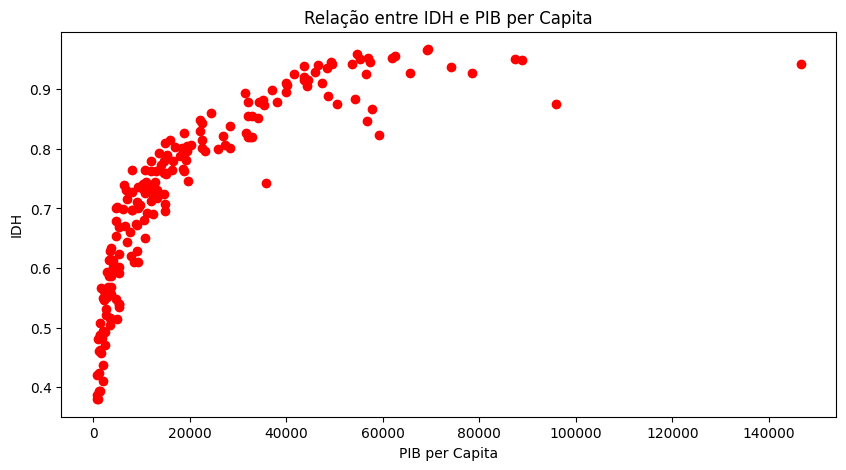

In [ ]:
# Criar uma figura com um tamanho especificado
plt.figure(figsize=(10, 5))

# Gráfico de dispersão do PIB per Capita contra o IDH
plt.scatter(
    df_completo['PIB per Capta ($)'], # x
    df_desenvolvimento['IDH'], # y
    color='r',
)

# Adicionar título e rótulos aos eixos
plt.title('Relação entre IDH e PIB per Capita')
plt.xlabel('PIB per Capita')
plt.ylabel('IDH')

# Exibir o gráfico
plt.show()

---------------------------------

##### **Questão 2: Existe alguma relação entre IDH e PIB per capita?**

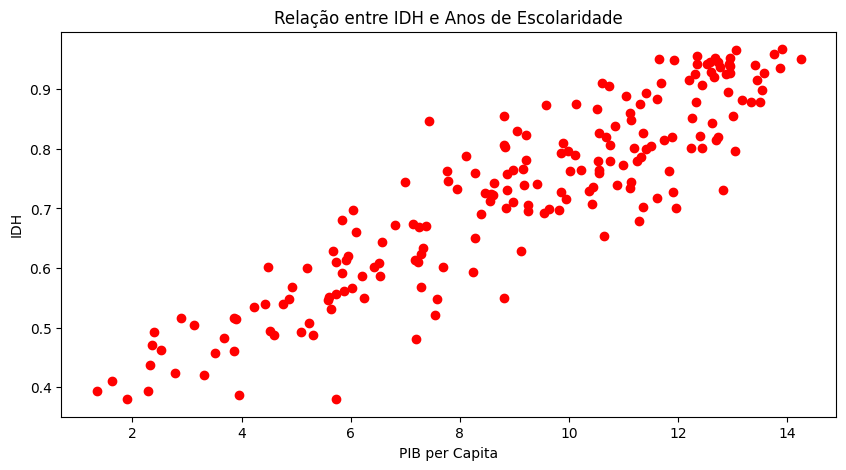

In [ ]:
# Criar uma figura com um tamanho especificado
plt.figure(figsize=(10, 5))

# Gráfico de dispersão do Anos de escolaridade (médio) contra o IDH
plt.scatter(
    df_completo['Anos de escolaridade (médio)'], # x
    df_desenvolvimento['IDH'], # y
    color='r',
)

# Adicionar título e rótulos aos eixos
plt.title('Relação entre IDH e Anos de Escolaridade')
plt.xlabel('PIB per Capita')
plt.ylabel('IDH')

plt.show()

----------------------------------------------

**Questão 3: Qual é a média do IDH para cada um dos continentes?**

In [ ]:
df_completo.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capta ($),Continente
0,switzerland,0.967,13.904066,69432.78669,Europe
1,norway,0.966,13.062343,69189.76165,Europe
2,iceland,0.959,13.767170,54688.37921,Europe
3,"hong kong, china (sar)",0.956,12.347770,62485.50516,Asia
4,denmark,0.952,12.960490,62018.95694,Europe


Para conseguir responder essa questão, é necessário agrupar os IDHs por continente e, então, extraír a média desses valores.

Felizmente, o pandas possue um método que facilita o cálculo de estatísticas descritivas de agrupamentos dos dados. O nome desta função é **groupby**.

In [ ]:
# Calculando a média para cada continente
media_por_continente = df_completo.groupby(['Continente'])['IDH'].mean().to_frame().reset_index()

In [ ]:
# Ordenando de maneira decrescente
media_por_continente = media_por_continente.sort_values(by = 'IDH', ascending = False)

In [ ]:
media_por_continente

,Continente,IDH
2,Europe,0.884634
5,South America,0.762000
3,North America,0.760435
1,Asia,0.750204
4,Oceania,0.709857
0,Africa,0.557037


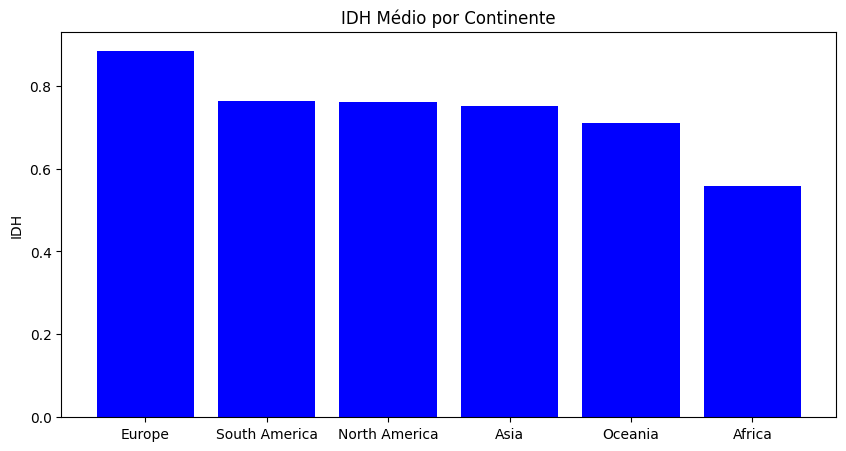

In [ ]:
# Criar uma figura com um tamanho especificado
plt.figure(figsize=(10, 5))

# Gráfico de barras com o IDH médio por continente
plt.bar(
    media_por_continente['Continente'], # x
    media_por_continente['IDH'], # y
    color='b',
)

# Adicionar título e rótulos aos eixos
plt.title('IDH Médio por Continente')
plt.ylabel('IDH')

plt.show()

----------------------------------------------

**Questão 4: Quantos países de cada continente possuem IDH acima da média global?**

Para resolver esta questão precisamos:

   1) Contabilizar o número total de países
   2) Identificar a média global
   3) Contabilizar o número total de países acima da média global
   4) Calcular o percentual divindo os resultados de 3 e 4
   5) Plotar os gráficos                               

Calculando o número total de países

In [ ]:
numero_total_paises = df_completo.groupby(['Continente'])['País'].count().to_frame().reset_index()

In [ ]:
numero_total_paises.head()

,Continente,País
0,Africa,54
1,Asia,49
2,Europe,41
3,North America,23
4,Oceania,14


Calculando a média global

In [ ]:
media_global = df_completo['IDH'].mean()

In [ ]:
print(f"Média global: {media_global}")

Média global: 0.7237409326424872


Calculando o número total de países acima da média global

In [ ]:
paises_acima_meida_global = df_completo[df_completo['IDH'] > media_global]
paises_acima_meida_global.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capta ($),Continente
0,switzerland,0.967,13.904066,69432.78669,Europe
1,norway,0.966,13.062343,69189.76165,Europe
2,iceland,0.959,13.767170,54688.37921,Europe
3,"hong kong, china (sar)",0.956,12.347770,62485.50516,Asia
4,denmark,0.952,12.960490,62018.95694,Europe


In [ ]:
numero_paises_acima_media = paises_acima_meida_global.groupby(['Continente'])['País'].count().to_frame().reset_index()

In [ ]:
numero_paises_acima_media.head()

,Continente,País
0,Africa,6
1,Asia,30
2,Europe,41
3,North America,16
4,Oceania,6


Calculando o percentual de países acima da média global

In [ ]:
numero_paises_acima_media['percentual_acima_media'] = (numero_paises_acima_media['País']/numero_total_paises['País'])*100

In [ ]:
numero_paises_acima_media

,Continente,País,percentual_acima_media
0,Africa,6,11.111111
1,Asia,30,61.224490
2,Europe,41,100.000000
3,North America,16,69.565217
4,Oceania,6,42.857143
5,South America,9,75.000000


In [ ]:
numero_paises_acima_media = numero_paises_acima_media.sort_values(by="percentual_acima_media", ascending=False)

Plotando os resultados

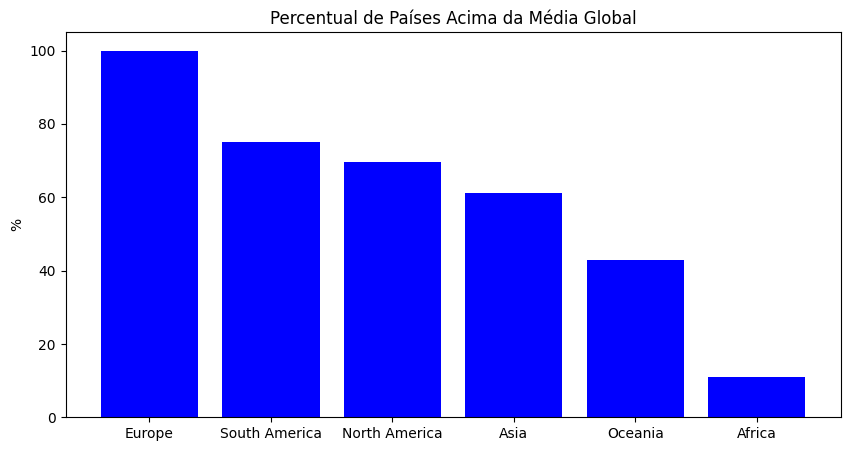

In [ ]:
# Criar uma figura com um tamanho especificado
plt.figure(figsize=(10, 5))

# Gráfico de barras
plt.bar(
    numero_paises_acima_media['Continente'], # x
    numero_paises_acima_media['percentual_acima_media'], # y
    color='b',
)

# Adicionar título e rótulos aos eixos
plt.title('Percentual de Países Acima da Média Global')
plt.ylabel('%')

plt.show()